In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import gridspec
import numpy as np

from scipy.io import savemat
from scipy.io import loadmat

import lion_tsne
from importlib import reload
reload(lion_tsne)  # Rerun this cell after update of lion_tsne


import os
import pickle
%matplotlib inline
from scipy.spatial import distance
from scipy import stats
import math
from matplotlib.font_manager import FontProperties

import pandas as pd

# Loading previous experiment outcomes

In [3]:
mnist_file = '../../experiment-temp-files/mnist.p'

print("Loading from file...")
#old_X_mnist = X_mnist

with open(mnist_file, 'rb') as f:
    X_mnist_raw, P_mnist, sigma_mnist, Y_mnist, labels_mnist_onehot, mnist_pca,\
    all_mnist_trained_images, all_mnist_labels, mnist_chosen_indices = pickle.load(f)

labels_mnist = np.argmax(labels_mnist_onehot,axis=1)

temp = np.ascontiguousarray(X_mnist_raw).view(np.dtype((np.void, X_mnist_raw.dtype.itemsize * X_mnist_raw.shape[1])))
_, un_idx = np.unique(temp, return_index=True)
X_mnist_raw = X_mnist_raw[un_idx, :]
labels_mnist = labels_mnist[un_idx]
mnist_chosen_indices = mnist_chosen_indices[un_idx]

X_mnist = mnist_pca.transform(X_mnist_raw)
#print(np.sum(old_X_mnist != X_mnist))
dTSNE_mnist = lion_tsne.LionTSNE(perplexity=30)
dTSNE_mnist.incorporate(x=X_mnist, y=Y_mnist, p_matrix=P_mnist, sigma=sigma_mnist)

Loading from file...


E:\Tools\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator PCA from version 0.19.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
D = distance.pdist(X_mnist)
print("After PCA - minimum distance between samples is ", np.min(D))
# We want to have 2500 DISTINCT samples, even after PCA.
# Should be around 0.45 for the data I know.

After PCA - minimum distance between samples is  0.45192705249623566


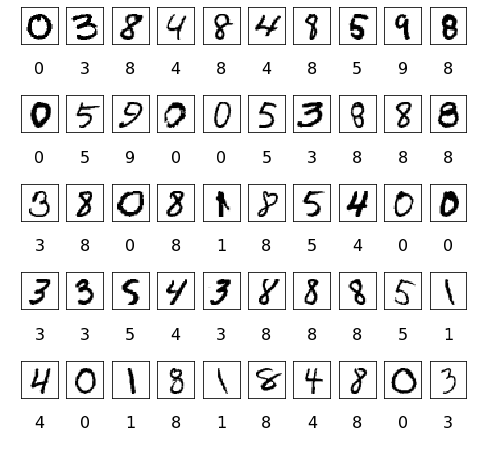

In [5]:
# Now we go through all 2500 samples one-by-one and correct mislabeling.
width = 10 #total number to show in one row
start_index = 1150

height = 10 # Number of rows /2 to show. half will go to labels, half to pictures.

f, ax = plt.subplots(height,width)
f.set_size_inches(8,8)
f.subplots_adjust()
for i in range(int(height/2)):
    for j in range(width):
        ax[2*i][j].imshow(X_mnist_raw[start_index + width*i + j,:].reshape(28,28), cmap='gray_r')
        ax[2*i+1][j].text(text=str(labels_mnist[start_index + width*i + j]),x=0.5, y=0.5,s=11,
                    ha='center', va='center', fontsize=16)
        ax[2*i][j].axes.get_xaxis().set_visible(False)
        ax[2*i][j].axes.get_yaxis().set_visible(False)
        ax[2*i+1][j].set_axis_off()
#f.subplots_adjust(left=-0.04, right=0.99, top=0.99,bottom=0.01)
plt.show(f)

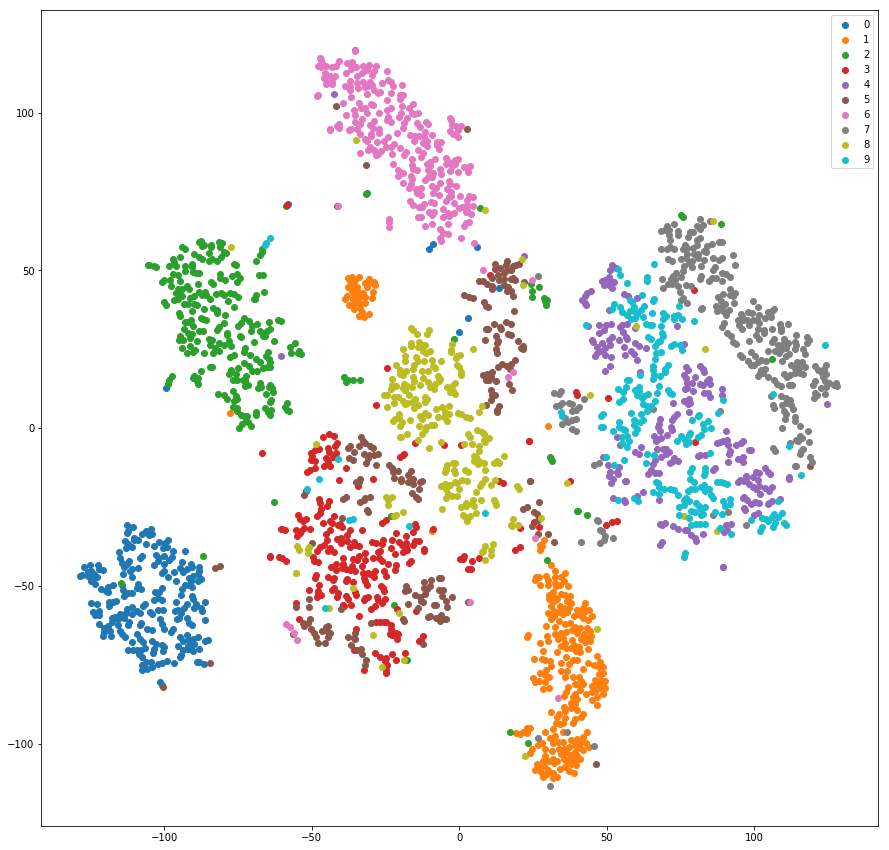

In [6]:
# That plot is just for my own reference 
plt.gcf().set_size_inches(15,15)
legend_list = list()
for l in set(sorted(labels_mnist)):
    plt.scatter(Y_mnist[labels_mnist == l, 0], Y_mnist[labels_mnist == l, 1], marker = 'o', alpha=1.0)
    legend_list.append(str(l))
#plt.title("MNIST Dataset - TSNE visualization")
#plt.tight_layout()
plt.legend(legend_list)
plt.show()

In [7]:
lion_toy_interp = dTSNE_mnist.generate_lion_tsne_embedder(verbose=0, random_state=0, function_kwargs={'y_safety_margin':0,
                                                                                                     'radius_y_percentile':100})

In [14]:
print(sigma_mnist.shape)

(2500, 1)


# Loading EMNIST

In [ ]:
emnist_train_dataset = pd.read_csv('../../emnist/emnist-balanced-train.csv', header=None)

In [ ]:
np.random.seed(456456) # Just to fix randiom choices

In [ ]:
emnist_train_dataset.head()

In [ ]:
emnist_train_dataset.iloc[start_index + width*i + j,1:]

In [ ]:
s = 28
np.array(emnist_train_dataset.iloc[0,:][1:]).reshape((s,s))

# Now we go through all 2500 samples one-by-one and correct mislabeling.
width = 10 #total number to show in one row
start_index = 0

height = 20 # Number of rows /2 to show. half will go to labels, half to pictures.

f, ax = plt.subplots(height,width)
f.set_size_inches(8,16)
f.subplots_adjust()
for i in range(int(height/2)):
    for j in range(width):
        ax[2*i][j].imshow(np.array(emnist_train_dataset.iloc[start_index + width*i + j,1:]).reshape(28,28).T, cmap='gray_r')
        ax[2*i+1][j].text(text=str(emnist_train_dataset.iloc[start_index + width*i + j, 0]),x=0.5, y=0.5,s=11,
                    ha='center', va='center', fontsize=16)
        ax[2*i][j].axes.get_xaxis().set_visible(False)
        ax[2*i][j].axes.get_yaxis().set_visible(False)
        ax[2*i+1][j].set_axis_off()
#f.subplots_adjust(left=-0.04, right=0.99, top=0.99,bottom=0.01)
plt.show(f)

In [ ]:
a_letters_only = emnist_train_dataset[emnist_train_dataset.iloc[:,0] == 10]

In [ ]:
width = 10 #total number to show in one row
start_index = 0

height = 20 # Number of rows /2 to show. half will go to labels, half to pictures.

f, ax = plt.subplots(height,width)
f.set_size_inches(8,16)
f.subplots_adjust()
for i in range(int(height)):
    for j in range(width):
        ax[i][j].imshow(np.array(a_letters_only.iloc[start_index + width*i + j,1:]).reshape(28,28).T, cmap='gray_r')
        ax[i][j].axes.get_xaxis().set_visible(False)
        ax[i][j].axes.get_yaxis().set_visible(False)
#f.subplots_adjust(left=-0.04, right=0.99, top=0.99,bottom=0.01)
plt.show(f)

As you see, there exists some mislabeling. See lower right corner. Some of A-labeled letters are not A.

Let's take one letter, transform it and make sure the place looks decent.

In [ ]:
X_mnist_raw.shape

In [ ]:
a_letters_only.shape

In [ ]:
print(np.array(a_letters_only.iloc[:,1:]).reshape((-1,28,28)).shape)
print(np.transpose(np.array(a_letters_only.iloc[:,1:]).reshape((-1,28,28)), axes=(0,2,1)).shape)

In [ ]:
a_letters_transposition_fixed = \
    np.transpose(np.array(a_letters_only.iloc[:,1:]).reshape((-1,28,28)), axes=(0,2,1)).reshape((-1, 28*28))
a_letters_transposition_fixed.shape

In [ ]:
a_letters_transposition_fixed = a_letters_transposition_fixed / 255.0

In [ ]:
# The order of rows and columns was different in original MNIST dataset and in EMNIST letters dataset.
# Now it should be fixed. Let's double-check that
width = 10 #total number to show in one row
start_index = 0

height = 20 # Number of rows /2 to show. half will go to labels, half to pictures.

f, ax = plt.subplots(height,width)
f.set_size_inches(8,16)
f.subplots_adjust()
for i in range(int(height)):
    for j in range(width):
        # Transposition should no longer be required
        ax[i][j].imshow(np.array(a_letters_transposition_fixed[start_index + width*i + j,:]).reshape(28,28), cmap='gray_r')
        ax[i][j].axes.get_xaxis().set_visible(False)
        ax[i][j].axes.get_yaxis().set_visible(False)
#f.subplots_adjust(left=-0.04, right=0.99, top=0.99,bottom=0.01)
plt.show(f)

That did it. Now EMNIST letters and MNIST digits are in the same format.

In [ ]:
a_letters_transformed = mnist_pca.transform(a_letters_transposition_fixed)

In [ ]:
#a_letters_only.shape
#a_letters_transformed.shape

In [ ]:
import lion_tsne
from importlib import reload
reload(lion_tsne)  # Rerun this cell after update of lion_tsne

cur_lion = lion_tsne.LionTSNE(perplexity=30)
cur_lion.incorporate(x=X_mnist, y=Y_mnist, p_matrix=P_mnist, sigma=sigma_mnist)
cur_interpolator = cur_lion.generate_lion_tsne_embedder(verbose=0, random_state=0, function_kwargs={'radius_x_percentile':100,
                                                                                                    'y_safety_margin':0,
                                                                                                    'radius_y_percentile':100,
                                                                                                    'power' : 26.6})
a_few_letters, _, _ = cur_interpolator(a_letters_transformed[:1000,:], verbose=0)




#a_few_letters = lion_toy_interp(a_letters_transformed[0:100,:])


#cur_lion = lion_tsne.LionTSNE(perplexity=30)
#cur_lion.incorporate(x=X_mnist, y=Y_mnist, p_matrix=P_mnist, sigma=sigma_mnist)
#cur_interpolator = cur_lion.generate_lion_tsne_embedder(verbose=0, random_state=0, function_kwargs={'y_safety_margin':0,
#                                                                                                     'radius_y_percentile':100})

#letters_to_add = 10

#Y_mnist_new = np.array(Y_mnist)
#X_mnist_new = np.array(X_mnist)
#for i in range(letters_to_add):
#    print("Adding letter ", i)
#    new_letter_position = cur_interpolator(a_letters_transformed[i:i+1,:])
#    Y_mnist_new = np.vstack((Y_mnist_new, new_letter_position))
#    X_mnist_new = np.vstack((X_mnist_new, a_letters_transformed[i:i+1,:]))

#    cur_lion = lion_tsne.LionTSNE(perplexity=30)
#    cur_lion.incorporate(x=X_mnist_new, y=Y_mnist_new)
#    cur_interpolator = cur_lion.generate_lion_tsne_embedder(verbose=0, random_state=0, function_kwargs={'y_safety_margin':0,
#                                                                                                         'radius_y_percentile':100})


In [ ]:
import lion_tsne
from importlib import reload
reload(lion_tsne)  # Rerun this cell after update of lion_tsne

x = [i*10 for i in range(1,100)]
fo = list()
no = list()
ap = list()
for i in range(len(x)):
    print(i)
    num_letters = x[i]
    
    # Not optimal_but that will do
    cur_lion = lion_tsne.LionTSNE(perplexity=30)
    cur_lion.incorporate(x=X_mnist, y=Y_mnist, p_matrix=P_mnist, sigma=sigma_mnist)
    cur_interpolator = cur_lion.generate_lion_tsne_embedder(verbose=0, random_state=0, function_kwargs={'radius_x_percentile':100,
                                                                                                        'y_safety_margin':0,
                                                                                                        'radius_y_percentile':100,
                                                                                                        'power' : 26.6})
    a_few_letters, fraction_outliers, num_outlier_clusters, avg_pts_per_outlier_cluster = \
                cur_interpolator(a_letters_transformed[:x[i],:], verbose=0, additional_output=True)
    fo.append(fraction_outliers)
    no.append(num_outlier_clusters)
    ap.append(avg_pts_per_outlier_cluster)

In [ ]:
plt.gcf().set_size_inches(15,15)
plt.plot(x, fo, marker='o')
plt.show()

In [ ]:
plt.gcf().set_size_inches(15,15)
plt.plot(x, no, marker='o')
plt.show()

In [ ]:
Y_mnist_new.shape

In [ ]:
plt.gcf().set_size_inches(15,15)
legend_list = list()
plt.scatter(Y_mnist[:, 0], Y_mnist[:, 1], marker = 'o', alpha=1.0, c='gray')
plt.scatter(a_few_letters[:, 0], a_few_letters[:, 1], marker = 'o', alpha=0.5, c='red')
#plt.scatter(Y_mnist_new[:Y_mnist.shape[0], 0], Y_mnist[:Y_mnist.shape[0], 1], marker = 'o', alpha=1.0, c='gray')
#plt.scatter(Y_mnist_new[Y_mnist.shape[0]:, 0], Y_mnist_new[Y_mnist.shape[0]:, 1], marker = 'o', alpha=0.5, c='red')
plt.show()

## Something is not right here. Letters are really mostly defined as outliers, but they do not group together in their own clusters. I expected to have one or several clusters of letter A. Instead, each writing of a letter . PCA consequence? Coding error? Interpolator misconfiguration?

# Test: Add existing digits and make sure they are at the same places

In [ ]:
x_mnist_2 = mnist_pca.transform(X_mnist_raw)

In [ ]:
y_mnist_2 = lion_toy_interp(x_mnist_2[:100, :])
labels_mnist_2 = labels_mnist[:100]

In [ ]:
plt.gcf().set_size_inches(15,15)
legend_list = list()
for l in set(sorted(labels_mnist)):
    plt.scatter(y_mnist_2[labels_mnist_2 == l, 0], y_mnist_2[labels_mnist_2 == l, 1], marker = '*', alpha=0.8, s=300)
for l in set(sorted(labels_mnist)):
    plt.scatter(Y_mnist[labels_mnist == l, 0], Y_mnist[labels_mnist == l, 1], marker = 'o', alpha=1.0,  edgecolors='k')
    legend_list.append(str(l))
#plt.title("MNIST Dataset - TSNE visualization")
#plt.tight_layout()
plt.legend(legend_list)
plt.show()

## This is, actually, good. Digits are grouped with digits, and clusters match. Hence, the code we used for letters seem to be working.

## However, this code has digits matching *exactly* certain point in existing plot. It is not a test of the interpolator.

# Trying full-size tSNE

In [ ]:
ptsne_train_mat = loadmat('mnist_train.mat')
ptsne_test_mat = loadmat('mnist_test.mat')

In [ ]:
ptsne_mapped = loadmat('mnist_mapped.mat') # We need Y to take as ground truth
ptsne_Y_train = ptsne_mapped['mapped_train_X']
ptsne_Y_test = ptsne_mapped['mapped_test_X']
ptsne_Y_outliers = ptsne_mapped['mapped_outliers_X']

In [ ]:
ptsne_X_train = ptsne_train_mat['train_X']
ptsne_labels_train = ptsne_train_mat['train_labels'].reshape(-1)-1
ptsne_X_test = ptsne_test_mat['test_X']
ptsne_labels_test = ptsne_test_mat['test_labels'].reshape(-1)-1

In [ ]:
ptsne_X_train = ptsne_train_mat['train_X']
ptsne_labels_train = ptsne_train_mat['train_labels'].reshape(-1)-1
ptsne_X_test = ptsne_test_mat['test_X']
ptsne_labels_test = ptsne_test_mat['test_labels'].reshape(-1)-1

In [ ]:
lTSNE_extended = lion_tsne.LionTSNE(perplexity=30) #That's the parameters used
lTSNE_extended.incorporate(ptsne_X_train, ptsne_Y_train,
                           p_matrix = np.ones((1,1)), #Don't care, don't need, and don't want to spend time recalculating
                           sigma = np.ones((1)) #same as above
                          )

In [ ]:
# That plot is just for my own reference 
plt.gcf().set_size_inches(8,8)
#chosen_ptsne = 2
legend_list = list()
for l in sorted(set(ptsne_labels_train)):
    plt.scatter(ptsne_Y_train[ptsne_labels_train == l,0], ptsne_Y_train[ptsne_labels_train == l,1], marker = '.', alpha=1.0)
    legend_list.append(str(l))
#plt.title("MNIST Dataset - TSNE visualization")
#plt.tight_layout()
plt.legend(legend_list)
plt.show()
#plt.scatter(res1['mapped_train_X'][:,0], res1['mapped_train_X'][:,1], c='gray',marker='.')

In [ ]:
import lion_tsne
from importlib import reload
reload(lion_tsne)  # Rerun this cell after update of lion_tsne

x = [i*10 for i in range(1,10)]
fo = list()
no = list()
ap = list()
for i in range(len(x)):
    print(i)
    num_letters = x[i]
    
    # Not optimal_but that will do
    cur_lion = lion_tsne.LionTSNE(perplexity=30)
    cur_lion.incorporate(x=ptsne_X_train, y=ptsne_Y_train)
    cur_interpolator = cur_lion.generate_lion_tsne_embedder(verbose=3, random_state=0, function_kwargs={'radius_x_percentile':100,
                                                                                                        'y_safety_margin':0,
                                                                                                        'radius_y_percentile':100,
                                                                                                        'power' : 26.6})
    a_few_letters, fraction_outliers, num_outlier_clusters, avg_pts_per_outlier_cluster = \
                cur_interpolator(a_letters_transposition_fixed[:x[i],:], verbose=3, additional_output=True)
    fo.append(fraction_outliers)
    no.append(num_outlier_clusters)
    ap.append(avg_pts_per_outlier_cluster)

In [ ]:
plt.gcf().set_size_inches(15,15)
legend_list = list()
plt.scatter(ptsne_Y_train[:,0], ptsne_Y_train[:,1], marker = '.', alpha=1.0, c='gray')
plt.scatter(a_few_letters[:,0], a_few_letters[:,1], marker = '.', alpha=0.5, c='red')
plt.show()

## So, a memory error. Let's keep the old one (PCA processed) then. Just need to find proper metrics.

# Adding letters to LION-tSNE

In [ ]:
# TODO

In [ ]:
91 + 13 + 57 + 46 + 100 + 65

# Adding letters by other methods

In [ ]:
# TODO